## Assignment Title : Linear Regression - Bike Sharing

#### Submitted By : Nachiket Shembekar

### Objective

For a US bike-sharing provider, BoomBikes, model the demand for shared bikes based on the independent variables provided within the input dataset 'day.csv'. This model will help the provider to understand demand dynamics in the post Covid-19 world and update their business strategies to cope with the revised customer expectations.

#### Overall Approach for Solution

1. Reading, Understanding, Cleaning and Visualizing the Data

   a. Reading & Understanding the Data
   
   b. Cleaning the Data
   
   c. Visualizing the Data
   

2. Preparing the data
    
3. Split the dataset into Training and Test data

4. Training the Model 

5. Residual Analysis

6. Predictions and Evaluations on the Test Set

##### Importing the necessary Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Libraries related to Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Increase the number of rows & columns being displayed for better clarity and analysis.
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)

#### Step 1 : Reading, Understanding, Cleaning & Visualizing the Data

###### a. Reading & Understanding the Data

In [2]:
# Read the day.csv file. It's assumed that the file is already loaded in Jupyter notebook, hence only file name is mentioned.
# include low_memory=False to avoid DtypeWarning.

bbikes_ds = pd.read_csv('day.csv',low_memory=False) 

In [3]:
# Before starting with Data cleaning, let's evaluate the dataset. Shape function will provide total rows & columns.
bbikes_ds.shape

(730, 16)

In [4]:
# Take a look at a quick snapshot of data to get understanding of various columns and data within them.
bbikes_ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bbikes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# We can see that majority of the columns are numeric. We can find few useful statistics through below function.
bbikes_ds.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### b. Cleaning the Data

#####  Analysis of columns and elimination of redundant, irrelevant or less meaningful ones in perspective of the solution.

  1. Columns with null values.
  2. Columns having no duplicate rows, i.e. unique values for each row.
  3. Any additional columns, with the help of Data dictionary, which are irrelevant for the analysis.
  4. Updating values for Categorical variables as necessary.

In [7]:
## 1. Identifying columns with null values

## In case of current dataset, there are no columns with 'all null' values.
## We will try to identify null values within the columns.

bbikes_ds_null_pcnt = round(bbikes_ds.isnull().sum()*100/len(bbikes_ds.index),2)
bbikes_ds_null_pcnt[bbikes_ds_null_pcnt>0]

Series([], dtype: float64)

###### Based on above output, no null values have been detected in the dataset

In [8]:
## 2. Columns with only one unique value or with all unique values (730) will not be useful for the analysis.

bbikes_ds.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [9]:
## The columns 'instant' & 'dteday' will not be useful for analysis, since they have all unique values.
## The values contained within 'dteday' are also available from other columns such s
## These can be dropped
bbikes_ds.drop(['instant','dteday'], axis=1 , inplace=True)

In [10]:
## 3. Any additional columns, with the help of Data dictionary, which are irrelevant for the analysis.

###### Let's take a look at the Data Dictionary

	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [11]:
## As per Data Dictionary, 'cnt' which is the target variable, is addition of the 2 columns 'casual' and 'registered'. 
## These 2 columns can be safely dropped.
bbikes_ds.drop(['casual','registered'], axis=1 , inplace=True)

In [12]:
## 4. Updating values for Categorical variables as necessary.
## The values can be referred from the Data Dictionary, which will help us in analyzing impact of these variables on the 
## bike rentals.

In [13]:
bbikes_ds['season'] = bbikes_ds['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bbikes_ds['mnth'] = bbikes_ds['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bbikes_ds['weekday'] = bbikes_ds['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bbikes_ds['weathersit'] = bbikes_ds['weathersit'].map({1:"Clear_Few_Clouds_Partly Cloudy",2:"Mist_few_clouds",3:"Light_snow_Light rain_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist_fog'})

In [14]:
## Let's look at the updated dataset

bbikes_ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist_few_clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist_few_clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear_Few_Clouds_Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear_Few_Clouds_Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear_Few_Clouds_Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bbikes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


###### c. Visualizing the data

Prior to the analysis, correlation can be checked to give overall understanding. We will use heatmap for the same, which will provide the correlation coefficients.

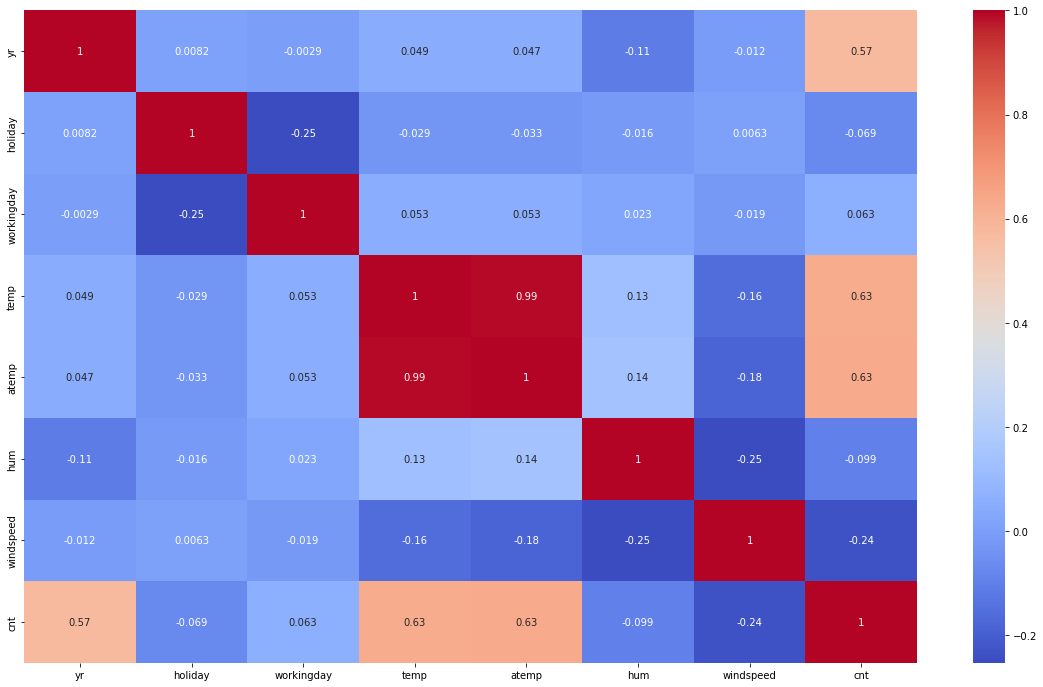

In [16]:
plt.figure(figsize=(20, 12))
sns.heatmap(bbikes_ds.corr(), cmap='coolwarm', annot=True)
plt.show()

In the above map, columns marked in warm (i.e. shades of red) colors are closely correlated as opposed to those, which are designated by cool (i.e. blue shades). 

1. 'yr', 'temp', 'atemp' have high correlation with 'cnt'. 
2. 'temp' and 'atemp' have high correlation with each other (0.99). Hence, we can remove one of these variables before proceeding with our analysis.

In [17]:
## Drop 'atemp' column having high correlation with 'temp'
bbikes_ds.drop(['atemp'], axis=1 , inplace=True)

In [18]:
## Updated dataset attributes
bbikes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [19]:
## Updated Statistics
bbikes_ds.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


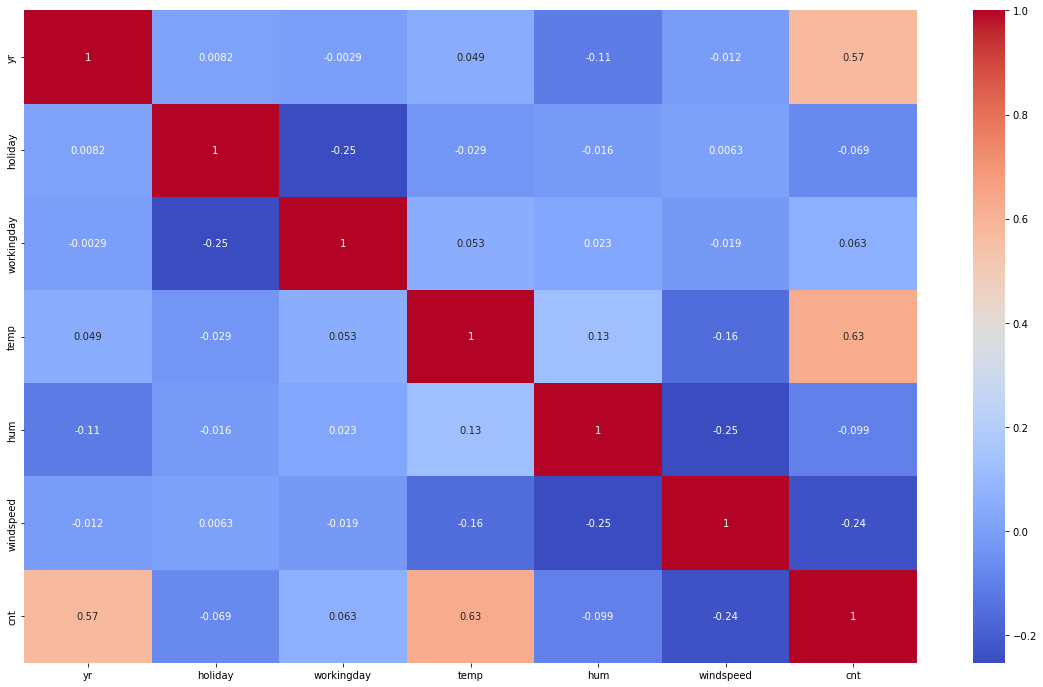

In [20]:
plt.figure(figsize=(20, 12))
sns.heatmap(bbikes_ds.corr(), cmap='coolwarm', annot=True)
plt.show()

##### Visualizing Categorical variables using boxplot. 

Variables : season, yr, mnth, holiday, weekday, workingday, weathersit

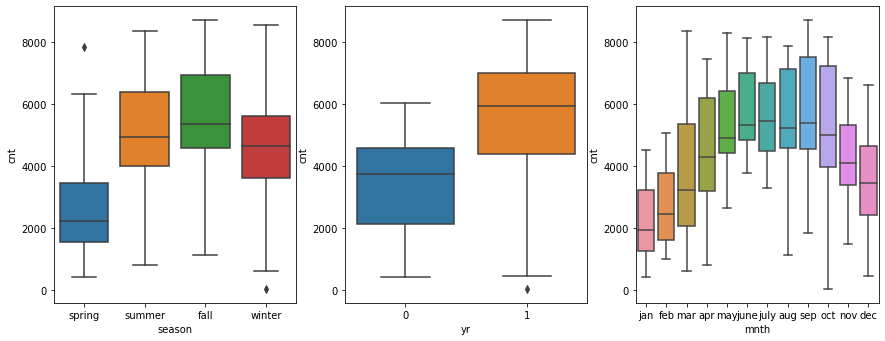

In [21]:
#visualizing the categorical variables of the dataset using boxplot - season, yr, mnth
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bbikes_ds)
plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=bbikes_ds)
plt.subplot(2, 4, 3)
sns.boxplot(x='mnth', y='cnt', data=bbikes_ds)
plt.show()

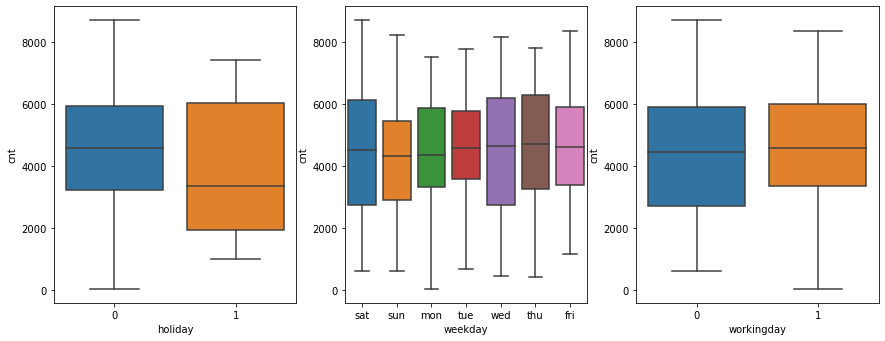

In [22]:
#visualizing the categorical variables of the dataset using boxplot - holiday, weekday, workingday
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='holiday', y='cnt', data=bbikes_ds)
plt.subplot(2, 4, 2)
sns.boxplot(x='weekday', y='cnt', data=bbikes_ds)
plt.subplot(2, 4, 3)
sns.boxplot(x='workingday', y='cnt', data=bbikes_ds)
plt.show()

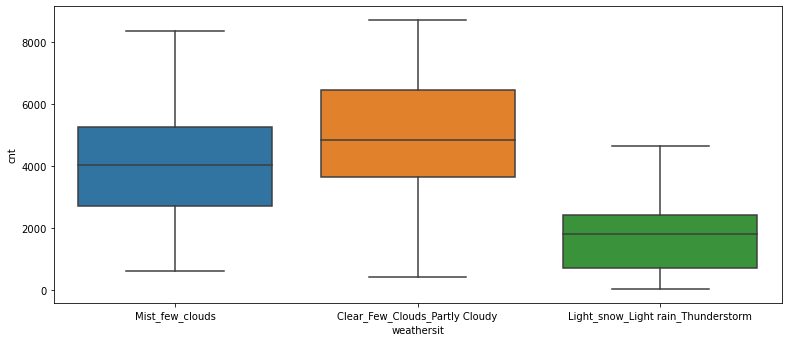

In [23]:
#visualizing the categorical variable of the dataset using boxplot - weathersit
plt.figure(figsize=(60, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='weathersit', y='cnt', data=bbikes_ds)
plt.show()

#### Observations :

1. Highest bike rentals are observed in Fall season followed by Summer. Spring season is least preferred.
2. Weather plays an important role, since most customers prefer to rent bikes during the days with clear sky or partly cloudy. They avoid extreme weather conditions such as snow, thunderstorm which is logical.
3. The bike rentals are higher between June to October, particularly in September & October, which may be because of good weather conditions.
4. There's significant rise in the bike rentals in 2019 as compared to 2018, which may be due to increased awareness for the benefits and/or good marketing.
5. Not much impact on the rental counts whether it's working day, which means this variable won't play significant role our decision making.
6. The rentals are lesser on holidays. Probable reasons could be them out of town or even due to higher rates on those days.

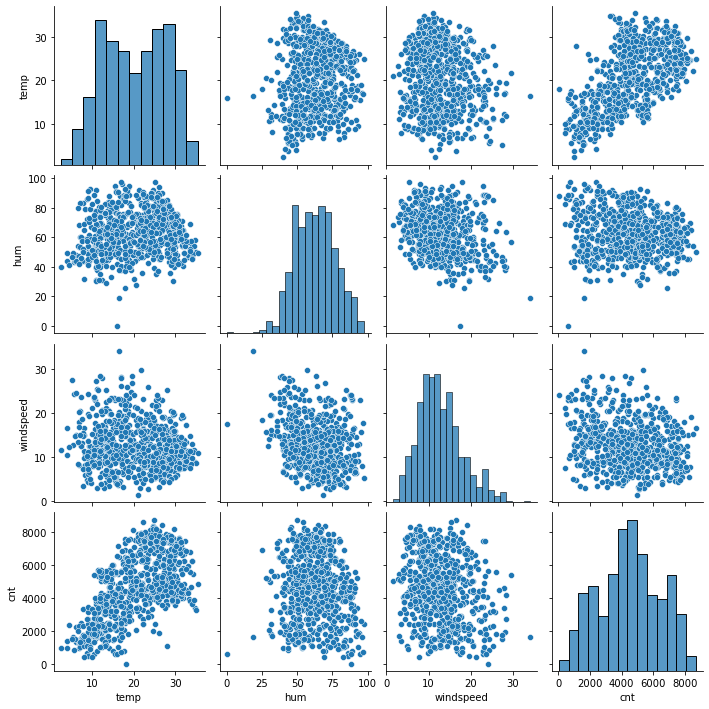

In [24]:
# Visualizing categorical variables 
sns.pairplot(bbikes_ds, vars=['temp','hum','windspeed',"cnt"])
plt.show()

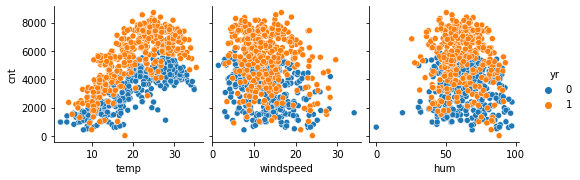

In [25]:
# Visualization of Relationship of Numerical Features against Target Variable for years 2018 & 2019

sns.pairplot(bbikes_ds, x_vars=['temp', 'windspeed', 'hum'],y_vars=['cnt'],hue ='yr')
plt.show()

#### Step 2 : Preparing the data

We will create the dummy variables now, in order to enable us to use a single regression equation to represent multiple groups.
The values for these variables will be binary (0 or 1) based on the applicability.

In [26]:
## Dummy Variables
bbikes_ds_season = pd.get_dummies(bbikes_ds.season,drop_first=True)
bbikes_ds_mnth = pd.get_dummies(bbikes_ds.mnth,drop_first=True)
bbikes_ds_weekday = pd.get_dummies(bbikes_ds.weekday,drop_first=True)
bbikes_ds_weathersit = pd.get_dummies(bbikes_ds.weathersit,drop_first=True)

In [27]:
## The revised dataset will be obtained by concatinating above dummy variables 
bbikes_ds = pd.concat([bbikes_ds,bbikes_ds_season,bbikes_ds_mnth,bbikes_ds_weekday,bbikes_ds_weathersit],axis=1)

## Original columns season, mnth, weekday and weathersit can now be dropped as the dummy variables hold the necessary values
bbikes_ds.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [28]:
## Display the revised dataset
bbikes_ds.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_Light rain_Thunderstorm,Mist_few_clouds
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
bbikes_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   temp                                730 non-null    float64
 4   hum                                 730 non-null    float64
 5   windspeed                           730 non-null    float64
 6   cnt                                 730 non-null    int64  
 7   spring                              730 non-null    uint8  
 8   summer                              730 non-null    uint8  
 9   winter                              730 non-null    uint8  
 10  aug                                 730 non-null    uint8  
 11  dec                                 730 non-n

In [30]:
## Display statistics for the revised dataset
bbikes_ds.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_Light rain_Thunderstorm,Mist_few_clouds
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 3 : Split the dataset into Training and Test data

In [31]:
## We are going to consider 70% data available for training and remaining 30% will be reserved for testing
np.random.seed(0)
bbikes_ds_train, bbikes_ds_test = train_test_split(bbikes_ds, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
## Check shape of Training & Testing datasets to validate 70%-30% split
bbikes_ds_train.shape

(510, 29)

In [33]:
bbikes_ds_test.shape

(219, 29)

###### Before proceeding, let's take a look at maximum values for each variable.

In [34]:
bbikes_ds_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_Light rain_Thunderstorm,Mist_few_clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.431169,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### The variables 'temp', 'hum', 'windspeed' and 'cnt' have higher values and need to be rescaled in the range of 0 & 1.

In [35]:
## Rescaling of variables using MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['hum', 'windspeed', 'temp', 'cnt']
bbikes_ds_train[num_vars] = scaler.fit_transform(bbikes_ds_train[num_vars])

In [36]:
bbikes_ds_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_Light rain_Thunderstorm,Mist_few_clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The min & max values for all the columns including the rescaled columns are now 0 & 1 respectively.

###### Before proceeding with training the model, let's take a look at train dataset for correlation between columns.

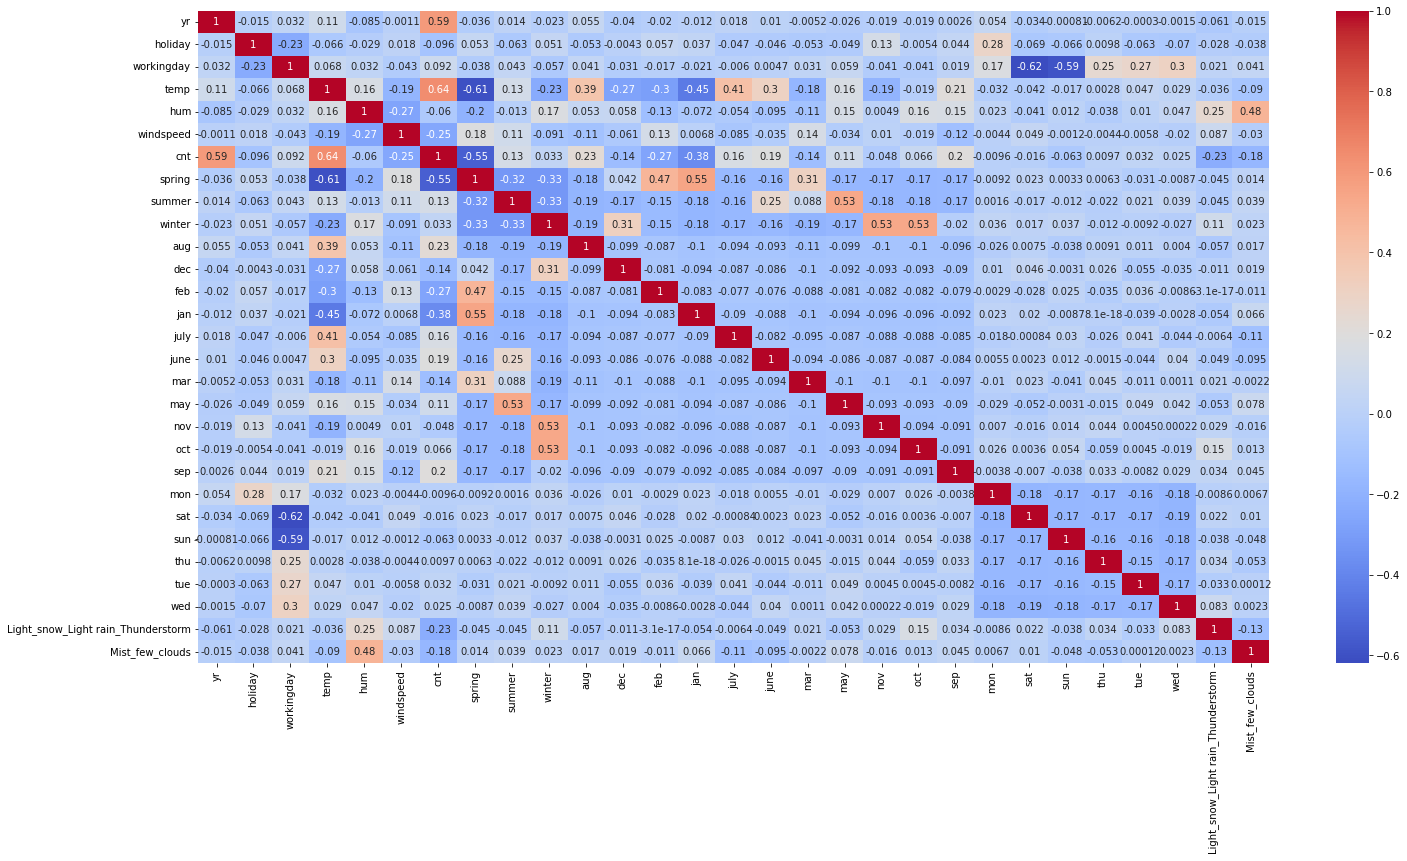

In [37]:
plt.figure(figsize=(24, 12))
sns.heatmap(bbikes_ds_train.corr(), cmap='coolwarm', annot=True)
plt.show()

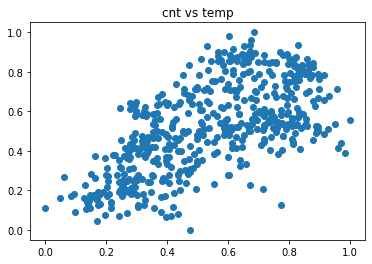

In [38]:
## A scatter plot between cnt and temp variables will show us their relation.

plt.figure(figsize=[6,4])
plt.scatter(bbikes_ds_train.temp, bbikes_ds_train.cnt)
plt.title('cnt vs temp')
plt.show()

#### Step 4 : Training the Model

###### 1st Model : Using 'temp' variable

In [39]:
## Creating x_train and y_train for model building
y_train = bbikes_ds_train.pop('cnt')
X_train = bbikes_ds_train

In [40]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_Light rain_Thunderstorm,Mist_few_clouds
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [41]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [42]:
# By default, statsmodels fits a line passing through the origin by default. 
# Hence, we are adding intercept

X_train_sm = sm.add_constant(X_train['temp'])

## Create first model
lr = sm.OLS(y_train, X_train_sm)

## Fit
lr_model = lr.fit()

## Params
lr_model.params

const    0.169798
temp     0.639952
dtype: float64

In [43]:
lr_model.params[0]

0.16979779410723536

In [44]:
lr_model.params[1]

0.6399515352074253

In [45]:
## statsmodel provides us a good statistical summary as follows

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           5.80e-61
Time:                        20:56:09   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### R-squared = 0.414. This would mean 41.4% variation in 'cnt' is explained by the variable 'temp'. 
#### The p-values '0.000' imply high significance 
##### We also got coefficient values as 0.1698 & 0.64, which we will use to draw fitted regression line.

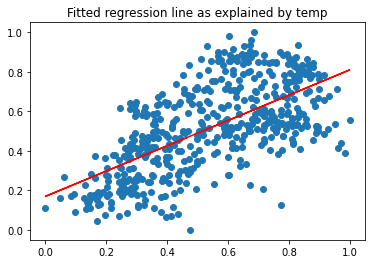

In [46]:
b0 = lr_model.params[0]
b1 = lr_model.params[1]

#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], b0 + b1 *X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [47]:
## Now, we will add another variable yr which has high correlation with cnt and observe the improvements in model if any.

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

## Create second model
lr = sm.OLS(y_train, X_train_sm)

## Fit
lr_model = lr.fit()

## Params
lr_model.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [48]:
## Revised model summary with temp and yr
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          9.25e-130
Time:                        20:56:09   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### R-squared = 0.692. This would mean 69.2% variation in 'cnt' is explained by the variables 'temp' and 'yr'

In [49]:
## adding all variables and finding out the R-squared values

In [50]:
## Viewing all columns in the dataset
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snow_Light rain_Thunderstorm', 'Mist_few_clouds'],
      dtype='object')

In [51]:
## Building model with all variables
X_train_sm = sm.add_constant(X_train)

## Create third model
lr = sm.OLS(y_train, X_train_sm)

## Fit
lr_model = lr.fit()

# Params
lr_model.params

const                                 0.245085
yr                                    0.232116
holiday                               0.009959
workingday                            0.096884
temp                                  0.450562
hum                                  -0.151340
windspeed                            -0.186453
spring                               -0.048159
summer                                0.038725
winter                                0.105847
aug                                   0.014404
dec                                  -0.045586
feb                                  -0.032282
jan                                  -0.062777
july                                 -0.040350
june                                 -0.002972
mar                                   0.001045
may                                   0.023940
nov                                  -0.041851
oct                                   0.007534
sep                                   0.081060
mon          

In [52]:
## Revised model summary with all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.74e-182
Time:                        20:56:09   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2451      0.035      6.955      0.000       0.176       0.314
yr                                     0.2321      0.008     28.820      0.000       0.216       0.248
holiday                                0.0100      0.024      0.415      0.678      -0.037       0.057
workingday                             0.0969      0.012      7.905      0.000       0.073       0.121
temp                                   0.4506      0.046      9.734      0.000       0.360       0.542
hum                                   -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                             -0.1865      0.026     -7.257      0.000      -0.237      -0.136
spring                                -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer                                 0.0387      0.026      1.478      0.140      -0.013       0.090
winter                                 0.1058      0.028      3.794      0.000       0.051       0.161
aug                                    0.0144      0.034      0.428      0.669      -0.052       0.081
dec                                   -0.0456      0.034     -1.358      0.175      -0.112       0.020
feb                                   -0.0323      0.033     -0.982      0.327      -0.097       0.032
jan                                   -0.0628      0.034     -1.873      0.062      -0.129       0.003
july                                  -0.0404      0.035     -1.151      0.250      -0.109       0.029
june                                  -0.0030      0.025     -0.119      0.906      -0.052       0.046
mar                                    0.0010      0.025      0.043      0.966      -0.047       0.049
may                                    0.0239      0.021      1.140      0.255      -0.017       0.065
nov                                   -0.0419      0.036     -1.152      0.250      -0.113       0.030
oct                                    0.0075      0.036      0.211      0.833      -0.063       0.078
sep                                    0.0811      0.032      2.533      0.012       0.018       0.144
mon                                   -0.0209      0.015     -1.366      0.173      -0.051       0.009
sat                                    0.0964      0.014      7.029      0.000       0.069       0.123
sun                                    0.0419      0.014      3.006      0.003       0.014       0.069
thu                                   -0.0092      0.016     -0.595      0.552      -0.040       0.021
tue                                   -0.0189      0.015     -1.219      0.223      -0.049       0.012
wed                                   -0.0054      0.015     -0.362      0.718      -0.035      

##### R-squared = 0.853. This would mean 85.3% variation in 'cnt' is explained by all the variables.
#### The p-values are greater than 0.05 for several variables e.g. holiday, Aug, Dec, Feb, Jan, July. 

#### During the RFE process, we will consider these p-values for dropping redundant variables.

##### Recursive Feature Elimination (RFE) :

The above approach was manual where we added one variable at a time in the model and observed the impact through R-squared values. 

RFE, which is the automated approach for effective selection of features (columns) in a training dataset that are more or most relevant in predicting the target variable. Through this approach, we will select the features/variables required for building the most optimized models and drop those which are redundant. 

We will make use of RFE ranking and Variance Inflation Factor (VIF) for this approach.

In [53]:
## To begin with, we will define a function for VIF calculation.

def Calc_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print(vif)

In [54]:
## Now we will create the RFE object

lm = LinearRegression()
lm.fit(X_train, y_train)

## Feature selection variables set to 15
rfe = RFE(lm, n_features_to_select = 15) 

# Fit RFE on training dataset
rfe = rfe.fit(X_train, y_train)

In [55]:
## Validate the list of selected and rejected variables in RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('Light_snow_Light rain_Thunderstorm', True, 1),
 ('Mist_few_clouds', True, 1)]

In [56]:
## Defining separate object for storing selected variables in RFE
bbikes_train_rfe_sel = X_train.columns[rfe.support_]
bbikes_train_rfe_sel

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'july', 'sep', 'sat',
       'Light_snow_Light rain_Thunderstorm', 'Mist_few_clouds'],
      dtype='object')

In [57]:
len(bbikes_train_rfe_sel)

15

###### We will now create a new training dataset using the selected variables in RFE i.e. X_train_rfe

In [58]:
X_train_rfe = X_train[bbikes_train_rfe_sel]

##### High Level Approach & Steps

1. Validate the statsmodel summary to check p-values, which indicate significance.
   We will consider p-value > 0.05 as High p-value.
   
2. Calculate VIF of the model, which indicates multicollinearity.
   We will consider VIF > 5 as High VIF.
   
3. Variables with
   
    (a) High p-value, High VIF : Definitely drop
    
    (b) High p-value, Low VIF : Drop these first, rebuild the model & recalculate VIF.
    
    (c) Low p-value, High VIF : Drop these later after confirming option (b).
    
    (d) Low p-value, Low VIF : Definitely retain

In [59]:
## Add constant/intercept
X_train_rfe1 = sm.add_constant(X_train_rfe)

## Create first model with RFE selected variables
lr = sm.OLS(y_train, X_train_rfe1)

## Fit
lr_model = lr.fit()

## Params
lr_model.params

const                                 0.251042
yr                                    0.230502
holiday                              -0.058529
workingday                            0.043521
temp                                  0.509836
hum                                  -0.154716
windspeed                            -0.185956
spring                               -0.050806
summer                                0.049660
winter                                0.094426
jan                                  -0.034326
july                                 -0.053193
sep                                   0.081186
sat                                   0.053721
Light_snow_Light rain_Thunderstorm   -0.248777
Mist_few_clouds                      -0.057824
dtype: float64

In [60]:
## Model summary with RFE selected variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.31e-191
Time:                        20:56:10   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2510      0.036      6.949      0.000       0.180       0.322
yr                                     0.2305      0.008     28.807      0.000       0.215       0.246
holiday                               -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                             0.0435      0.012      3.781      0.000       0.021       0.066
temp                                   0.5098      0.034     14.851      0.000       0.442       0.577
hum                                   -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                             -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring                                -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer                                 0.0497      0.015      3.346      0.001       0.020       0.079
winter                                 0.0944      0.017      5.479      0.000       0.061       0.128
jan                                   -0.0343      0.017     -1.980      0.048      -0.068      -0.000
july                                  -0.0532      0.018     -2.947      0.003      -0.089      -0.018
sep                                    0.0812      0.016      4.934      0.000       0.049       0.114
sat                                    0.0537      0.014      3.707      0.000       0.025       0.082
Light_snow_Light rain_Thunderstorm    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Mist_few_clouds                       -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
## Calculate VIF of the model

Calc_VIF(X_train_rfe1)

                              Features    VIF
0                                const  84.59
7                               spring   5.08
4                                 temp   3.89
9                               winter   3.60
8                               summer   2.64
5                                  hum   1.92
3                           workingday   1.88
13                                 sat   1.78
10                                 jan   1.57
15                     Mist_few_clouds   1.57
11                                july   1.49
12                                 sep   1.30
14  Light_snow_Light rain_Thunderstorm   1.25
6                            windspeed   1.21
2                              holiday   1.16
1                                   yr   1.04


##### Let's assess the variables based on the prioritization approach established earlier.

1. High p-value, High VIF : None
2. High p-value, Low VIF : None
3. Low p-value, High VIF : const, spring

In [62]:
## The constant absorbs bias for the regression model and we do not want to drop it

## We can drop the 'spring' variable which as high VIF.
X_train_rfe1 = X_train_rfe1.drop(['spring'], axis = 1)

In [63]:
## Add constant/intercept
X_train_rfe2 = sm.add_constant(X_train_rfe1)

## Create first model with RFE selected variables
lr = sm.OLS(y_train, X_train_rfe2)

## Fit
lr_model = lr.fit()

## Params
lr_model.params

const                                 0.200335
yr                                    0.229357
holiday                              -0.059951
workingday                            0.043876
temp                                  0.567672
hum                                  -0.164267
windspeed                            -0.193177
summer                                0.074571
winter                                0.126584
jan                                  -0.039157
july                                 -0.044535
sep                                   0.092597
sat                                   0.054019
Light_snow_Light rain_Thunderstorm   -0.244622
Mist_few_clouds                      -0.055634
dtype: float64

In [64]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.24e-191
Time:                        20:56:10   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2003      0.030      6.717      0.000       0.142       0.259
yr                                     0.2294      0.008     28.567      0.000       0.214       0.245
holiday                               -0.0600      0.027     -2.220      0.027      -0.113      -0.007
workingday                             0.0439      0.012      3.793      0.000       0.021       0.067
temp                                   0.5677      0.025     22.572      0.000       0.518       0.617
hum                                   -0.1643      0.037     -4.402      0.000      -0.238      -0.091
windspeed                             -0.1932      0.025     -7.597      0.000      -0.243      -0.143
summer                                 0.0746      0.011      6.836      0.000       0.053       0.096
winter                                 0.1266      0.011     11.208      0.000       0.104       0.149
jan                                   -0.0392      0.017     -2.261      0.024      -0.073      -0.005
july                                  -0.0445      0.018     -2.503      0.013      -0.079      -0.010
sep                                    0.0926      0.016      5.836      0.000       0.061       0.124
sat                                    0.0540      0.015      3.709      0.000       0.025       0.083
Light_snow_Light rain_Thunderstorm    -0.2446      0.026     -9.373      0.000      -0.296      -0.193
Mist_few_clouds                       -0.0556      0.010     -5.355      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       60.777   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.515
Skew:                          -0.658   Prob(JB):                     1.68e-29
Kurtosis:                       5.122   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
## Recalculate VIF of the model

Calc_VIF(X_train_rfe2)

                              Features    VIF
0                                const  57.07
4                                 temp   2.07
5                                  hum   1.90
3                           workingday   1.88
12                                 sat   1.78
14                     Mist_few_clouds   1.56
9                                  jan   1.55
8                               winter   1.53
10                                july   1.43
7                               summer   1.41
13  Light_snow_Light rain_Thunderstorm   1.25
6                            windspeed   1.19
11                                 sep   1.19
2                              holiday   1.16
1                                   yr   1.03


##### Based on below observations, we can consider this model as final.


1. All the P Value are less than 0.03, Which indicates that all the features retained are Statistically Significant
2. High R-squared (84.7%) and Adjusted R-squared (84.2%) values.
3. Prob(F-statistic) is very low, which indicates the model being a good fit.

#### Step 5 : Residual Analysis

In [66]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lr_model.predict(X_train_rfe2)
res = y_train - y_train_pred

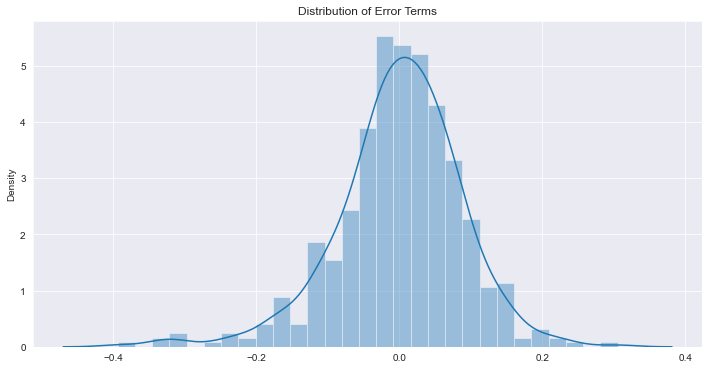

In [67]:
## Validate distribution of the error terms.

## Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

######  Error Terms are normally Distributed with mean Zero. Hence our model is following Normality of error terms.

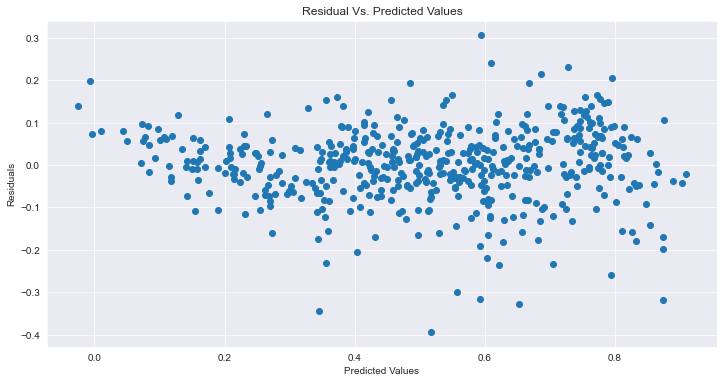

In [68]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

No specific Pattern is observed in the Error Terms with respect to Prediction. Thus Error terms can be considered independent of each other.

##### Validation for homoscedasticity 

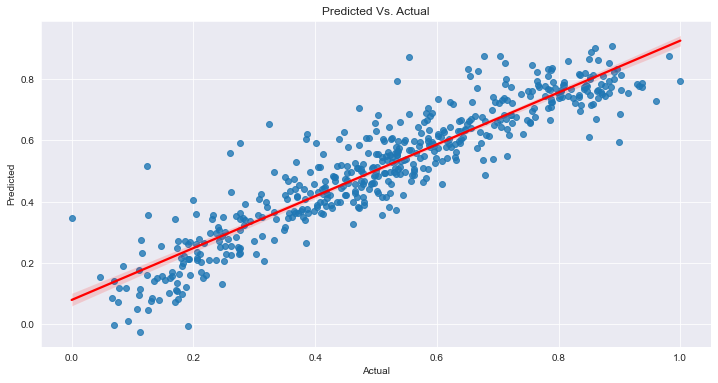

In [69]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred,line_kws={"color": "red"})
plt.title('Predicted Vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Error Terms nearly have a Constant Variance, hence it can be considered to follow the Assumption of Homoscedasticity.

#### Step 6 : Predictions and Evaluations on the Test Set

###### MinMax scaling on the test dataset

In [70]:
## We have previously defined num_vars = ['temp', 'windspeed',"hum",'cnt']

bbikes_ds_test[num_vars]=scaler.transform(bbikes_ds_test[num_vars])

y_test = bbikes_ds_test.pop('cnt')

## We will retain the same columns in the 'test' dataset as that of the 'train' dataset
## To begin with, we can use the column list 'bbikes_train_rfe_sel' and then drop the variable 'spring'.

X_test = bbikes_ds_test[bbikes_train_rfe_sel]
X_test = X_test.drop(['spring'],axis=1)
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,jan,july,sep,sat,Light_snow_Light rain_Thunderstorm,Mist_few_clouds
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,1,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,0


In [71]:
# Predict the values for Test Data using the Trained Model
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.sample(5)

491    0.640204
159    0.652214
278    0.534948
175    0.552853
677    0.651065
dtype: float64

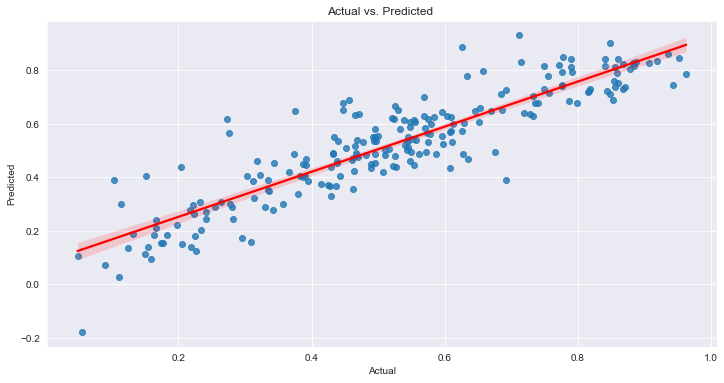

In [72]:
# Plotting y_test against y_pred 

plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred,line_kws={"color": "red"})
plt.title('Actual vs. Predicted ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### The Scatter Plot showcases linear Relationship between actual and predicted values of y_test

In [73]:
# Checking the Accuracy of the Test Model using r2_score
round(r2_score(y_test,y_test_pred),4)

0.8046

##### The model accuracy is 80.5%, Which is a fairly good score.

In [74]:
Coef = round(lr_model.params,2)
b = Coef.sort_values(ascending = False)
b

temp                                  0.57
yr                                    0.23
const                                 0.20
winter                                0.13
sep                                   0.09
summer                                0.07
sat                                   0.05
workingday                            0.04
jan                                  -0.04
july                                 -0.04
holiday                              -0.06
Mist_few_clouds                      -0.06
hum                                  -0.16
windspeed                            -0.19
Light_snow_Light rain_Thunderstorm   -0.24
dtype: float64

In [75]:
## Print equation of Best Fit Line based on our model

print("cnt = ",end="")
for i in range(0, len(b)-1):
    print('(',b[i],') * ',b.index[i], end = " + ")
print('(',b[len(b)-1],') * ',b.index[len(b)-1])

cnt = ( 0.57 ) *  temp + ( 0.23 ) *  yr + ( 0.2 ) *  const + ( 0.13 ) *  winter + ( 0.09 ) *  sep + ( 0.07 ) *  summer + ( 0.05 ) *  sat + ( 0.04 ) *  workingday + ( -0.04 ) *  jan + ( -0.04 ) *  july + ( -0.06 ) *  holiday + ( -0.06 ) *  Mist_few_clouds + ( -0.16 ) *  hum + ( -0.19 ) *  windspeed + ( -0.24 ) *  Light_snow_Light rain_Thunderstorm


##### Replacing 'const' by 1 and including negative signs, the equation would become 
##### cnt = 0.2 + ( 0.57 ) *  temp + ( 0.23 ) *  yr +  ( 0.13 ) *  winter + ( 0.09 ) *  sep + ( 0.07 ) *  summer + ( 0.05 ) *  sat + ( 0.04 ) *  workingday - (0.04 ) *  jan - (0.04 ) *  july  - (0.06 ) *  holiday  - (0.06 ) *  Mist_few_clouds  - (0.16 ) *  hum - (0.19 ) *  windspeed - (0.24 ) *  Light_snow_Light rain_Thunderstorm


#### Observations & Conclusions

- Temperature seems to be the most significant and dominant feature. Warmer temperature attracts more customers to rent the bikes and increases business.

- Adverse weather conditions such as cloudy, windy or extreme ones such as snow/rain/thunderstorm have negative impact as customers do not prefer to rent bikes during such conditions.

- Summer & winter seasons are preferred over rainy seasons. Boombikes can think of lowering their rates during these 'Off Seasons' to attract more customers.

- Preference is to rent the bikes on working days as well as Saturdays, whereas customers mostly avoid renting bikes over holidays. This could be due their unavailability (Traveling out of town) or increased rentals during this time. Boombikes can think about having some exciting offers or discounts especially around holidays.

- Overall there's an increase in the demand in 2019 as compared to 2018. This could be due to increased awareness or an effect of good marketing that Boombikes may be doing already. This shows a positive trend to invest more in future.

- Without implementing any new recommendations (going Business as Usual), Boombikes can expect to grow by 20%